In [ ]:
# A transformations is a tool that alters each data point in a column in a systematic way that makes it cleaner for a ML model to use
# for instance it means squaring a value or taking square root of a value.
# Box - Cox is powerful transformation. The base form of this type of transformation is y to the x power, where y is the value in an individual cell, and the x is the exponent of the power transformation you're applying.
# Steps for transformation.
# First you determine what range of exponents you want to test out. So in our example we had a range from negative two to positive two. And that's a commonly used range. 
# Then you'd apply these transformations to each value in the feature you'd like to transform. 
# Then you'd use some criteria to determine which of the transformations yielded the best distribution. You can read about what different criteria you can use to determine the best distribution

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
dataset = pd.read_csv("SMSSpamCollection.txt", sep = '\t', header = None)
dataset.columns = ['label','body_text']

In [3]:
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100
dataset['punct%'] = dataset['body_text'].apply(lambda x:count_punct(x))
dataset.head()

,label,body_text,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",9.8
1,ham,Ok lar... Joking wif u oni...,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,4.7
3,ham,U dun say so early hor... U c already then say...,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",4.1


In [4]:
import re
import string
def count_capital(text):
    text_no_punct = "".join([char for char in text if char not in string.punctuation])
    count = sum([1 for char in text_no_punct if (char == char.upper() and char != " ")])
    return count
dataset['cap_count'] = dataset['body_text'].apply(lambda x: count_capital(x))
dataset.head()

,label,body_text,punct%,cap_count
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",9.8,3
1,ham,Ok lar... Joking wif u oni...,25.0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,4.7,35
3,ham,U dun say so early hor... U c already then say...,15.4,2
4,ham,"Nah I don't think he goes to usf, he lives around here though",4.1,2


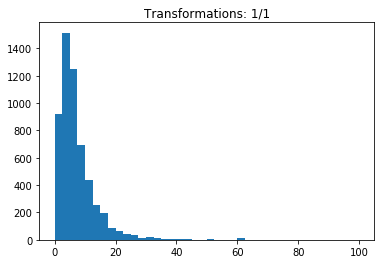

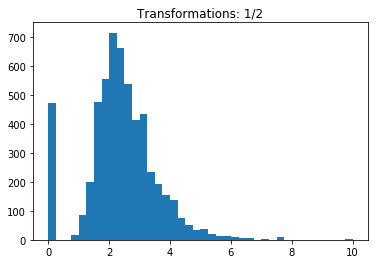

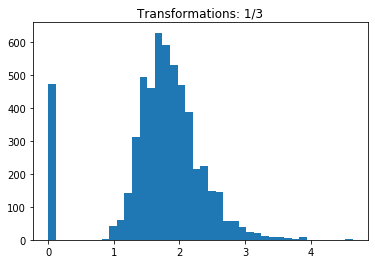

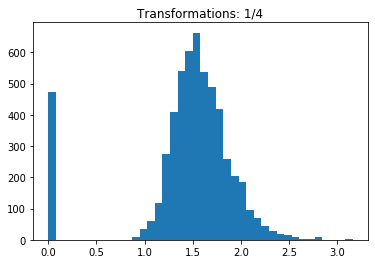

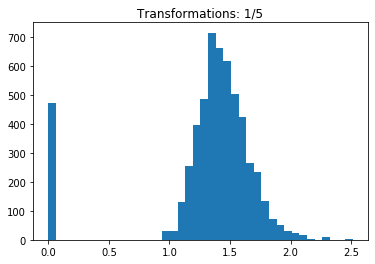

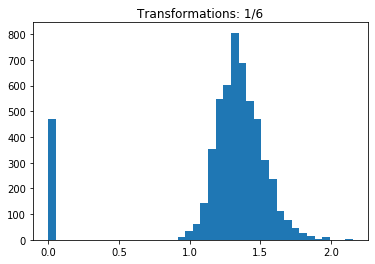

In [5]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline
for i in [1,2,3,4,5,6]:
    pyplot.hist(dataset['punct%']**(1/i), bins = 40)
    pyplot.title('Transformations: 1/{}'.format(str(i)))
    pyplot.show()

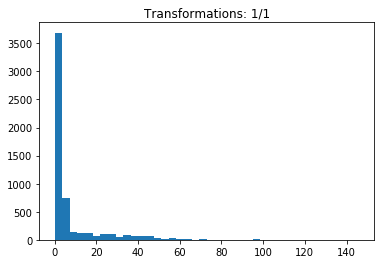

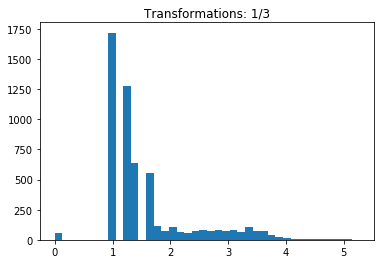

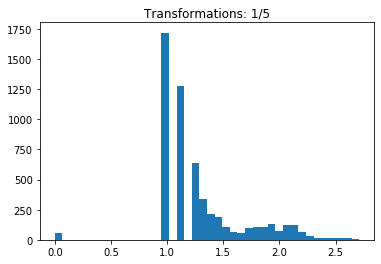

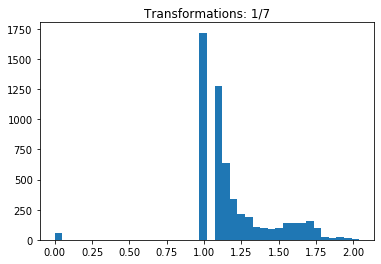

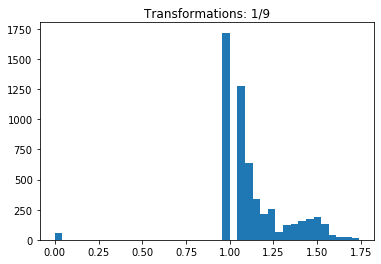

In [6]:
for i in range(1,10,2):
    pyplot.hist(dataset['cap_count']**(1/i), bins = 40)
    pyplot.title('Transformations: 1/{}'.format(str(i)))
    pyplot.show()